In [5]:
import numpy as np
import pandas as pd
from core import experiment, generate_data, parallel_experiments
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
from dp import rDP
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Strong change points affecting all series

cov = identity matrix 

jumps limited to magnitude of 10

###

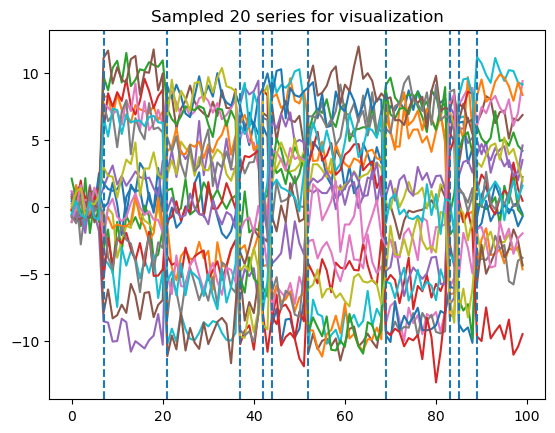

In [2]:
beta, noises, jump_idces = generate_data(T = 100, N = 100, n_jumps = 10, level_bounds = 10, min_gaps = 0, partial_effect_ratio = 1, show_plot = True)


In [3]:
rst = experiment(beta, noises, jump_idces, 0.9, 0.05)

In [4]:
rst

,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,ins_mse,ins_mae,oos_mse,oos_mae
method,,,,,,,,,,,,,,
posi,0.909091,1.0,0.99,0.0,0.090909,11,1,10,0,0.211652,0.905628,0.754528,0.828331,0.710162
rdp_union,0.153846,1.0,0.45,0.0,0.846154,65,55,10,0,NaN,0.348314,0.334583,0.335432,0.331934
rdp_intersection,NaN,0.0,0.90,1.0,NaN,0,0,0,10,NaN,31.196178,4.679616,27.079303,4.325437
rdp_fuzzy,1.000000,0.7,0.97,0.3,0.000000,7,0,7,3,NaN,8.362996,1.926483,10.586929,2.242845
panel_rdp,0.909091,1.0,0.99,0.0,0.090909,11,1,10,0,NaN,0.903121,0.758456,0.819346,0.711476


In [5]:
import selectinf, regreg

In [6]:
# %load_ext line_profiler
# %lprun -f regreg.algorithms.FISTA.backtrack experiment(beta, noises, jump_idces, 0.8, 0.05)

### Weak change points affecting only some series

cov = identity matrix 

jumps limited to magnitude of 1

every jump affects only half of the time series

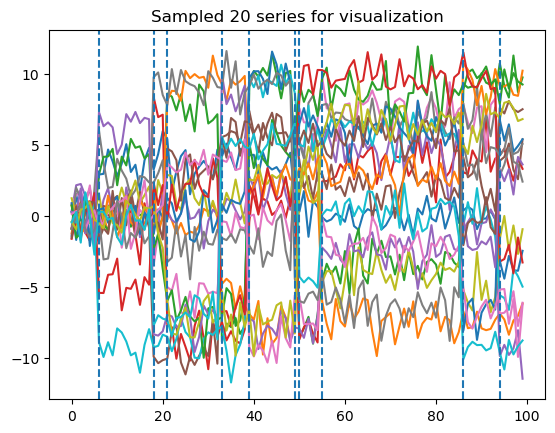

In [7]:
beta, noises, jump_idces = generate_data(T = 100, N = 100, n_jumps = 10, level_bounds = 10, min_gaps = 0, partial_effect_ratio = 0.5, show_plot = True)

In [8]:
rst = experiment(beta, noises, jump_idces, 0.8, 0.05)

In [9]:
rst

,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,ins_mse,ins_mae,oos_mse,oos_mae
method,,,,,,,,,,,,,,
posi,1.000000,1.0,1.00,0.0,0.000000,10,0,10,0,0.170747,0.909669,0.755549,0.869704,0.730133
rdp_union,0.208333,1.0,0.62,0.0,0.791667,48,38,10,0,NaN,0.511415,0.485579,0.494367,0.470217
rdp_intersection,NaN,0.0,0.90,1.0,NaN,0,0,0,10,NaN,28.434406,4.321901,30.697107,4.356051
rdp_fuzzy,1.000000,0.6,0.96,0.4,0.000000,6,0,6,4,NaN,6.705528,1.654208,9.028054,1.906237
panel_rdp,1.000000,0.2,0.92,0.8,0.000000,2,0,2,8,NaN,14.938304,2.586476,16.146041,2.724750


In [10]:

# demo of parallel experiment
para_rst = parallel_experiments(n_runs = 10, n_jobs = 5, T = 100, N = 100, n_jumps = 1, level_bounds = 10, min_gaps = 0, partial_effect_ratio = 1)


100%|██████████| 10/10 [01:31<00:00,  9.10s/it]


In [11]:
para_rst

precision  recall  accuracy  Type II error  \
           method                                                         
mean       posi               1.000000     1.0      1.00            0.0   
           rdp_union          0.021749     1.0      0.55            0.0   
           rdp_intersection        NaN     0.0      0.99            1.0   
           rdp_fuzzy          1.000000     1.0      1.00            0.0   
           panel_rdp          0.500000     1.0      0.99            0.0   
std        posi               0.000000     0.0      0.00            0.0   
           rdp_union          0.000473     0.0      0.01            0.0   
           rdp_intersection        NaN     0.0      0.00            0.0   
           rdp_fuzzy          0.000000     0.0      0.00            0.0   
           panel_rdp          0.000000     0.0      0.00            0.0   
max        posi               1.000000     1.0      1.00            0.0   
           rdp_union          0.022222     1.0      0.56            0.0   
           rdp_intersection        NaN     0.0      0.99            1.0   
           rdp_fuzzy          1.000000     1.0      1.00            0.0   
           panel_rdp          0.500000     1.0      0.99            0.0   
min        posi               1.000000     1.0      1.00            0.0   
           rdp_union          0.021277     1.0      0.54            0.0   
           rdp_intersection        NaN     0.0      0.99            1.0   
           rdp_fuzzy          1.000000     1.0      1.00            0.0   
           panel_rdp          0.500000     1.0      0.99            0.0   
lower_conf posi               1.000000     1.0      1.00            0.0   
           rdp_union          0.021277     1.0      0.54            0.0   
           rdp_intersection        NaN     0.0      0.99            1.0   
           rdp_fuzzy          1.000000     1.0      1.00            0.0   
           panel_rdp          0.500000     1.0      0.99            0.0   
upper_conf posi               1.000000     1.0      1.00            0.0   
           rdp_union          0.022222     1.0      0.56            0.0   
           rdp_intersection        NaN     0.0      0.99            1.0   
           rdp_fuzzy          1.000000     1.0      1.00            0.0   
           panel_rdp          0.500000     1.0      0.99            0.0   

                             Type I error  # selected  # false selection  \
           method                                                          
mean       posi                  0.000000         1.0                0.0   
           rdp_union             0.978251        46.0               45.0   
           rdp_intersection           NaN         0.0                0.0   
           rdp_fuzzy             0.000000         1.0                0.0   
           panel_rdp             0.500000         2.0                1.0   
std        posi                  0.000000         0.0                0.0   
           rdp_union             0.000473         1.0                1.0   
           rdp_intersection           NaN         0.0                0.0   
           rdp_fuzzy             0.000000         0.0                0.0   
           panel_rdp             0.000000         0.0                0.0   
max        posi                  0.000000         1.0                0.0   
           rdp_union             0.978723        47.0               46.0   
           rdp_intersection           NaN         0.0                0.0   
           rdp_fuzzy             0.000000         1.0                0.0   
           panel_rdp             0.500000         2.0                1.0   
min        posi                  0.000000         1.0                0.0   
           rdp_union             0.977778        45.0               44.0   
           rdp_intersection           NaN         0.0                0.0   
           rdp_fuzzy             0.000000         1.0                0.0   
           panel_rdp            